In [1]:
import numpy as np
from tqdm import tqdm

import os
import time
from datetime import datetime

In [6]:
def match_annotations_npy(dirname, filepath):
    filename = os.path.basename(filepath)    
    search_filename = filename.split('.')[0]
        
    file_list = os.listdir(dirname)
    filenames = [f for f in file_list if search_filename in f if f.endswith('.npy')]
    return filenames

In [17]:
PROCESSED_DATA_PATH = os.path.join('/tf','00_data','kdpark')
save_signals_path = os.path.join(PROCESSED_DATA_PATH,'signals_filtered_C3A2')
save_annotations_path = os.path.join(PROCESSED_DATA_PATH,'sleep_edf','all_channels','annotations')
list_files = [os.path.join(save_signals_path, f) for f in os.listdir(save_signals_path) if f.endswith('.npy')]
train_test_split = 1.0
split_cnt = int(train_test_split * len(list_files))

list_files_train = []
list_files_test = []

list_ann_files_train = []
list_ann_files_test = []

list_files_train = list_files[:split_cnt]

for f in list_files_train:
    ann_file = match_annotations_npy(save_annotations_path, f)
    list_ann_files_train.append(os.path.join(save_annotations_path, ann_file[0]))

list_files_test += list_files[split_cnt:]

for f in list_files[split_cnt:]:
    ann_file = match_annotations_npy(save_annotations_path, f)
    list_ann_files_test.append(os.path.join(save_annotations_path, ann_file[0]))

In [18]:
os.path.basename(list_files_train[0])

'A2018-EM-01-0072.npy'

In [97]:
sumXY, sumX, sumY, sumX2, sumY2, cnt = 0, 0, 0, 0, 0, 0
for f in tqdm(list_files_train):
    signal_C3A2 = np.load(f)
    save_signals_path_compare = os.path.join(PROCESSED_DATA_PATH,'signals_filtered_LeftA2')
    signal_compare = np.load(os.path.join(save_signals_path_compare, os.path.basename(f)))
    sumXY += np.sum(signal_C3A2 * signal_compare)
    sumX += np.sum(signal_C3A2)
    sumY += np.sum(signal_compare)
    sumX2 += np.sum(signal_C3A2 ** 2)
    sumY2 += np.sum(signal_compare ** 2)
    cnt += signal_C3A2.shape[0] * signal_C3A2.shape[1]
    

100%|██████████| 936/936 [08:04<00:00,  1.93it/s]


In [98]:
EX = sumX / cnt
EY = sumY / cnt
EXY = sumXY / cnt
stdX = (sumX2 / cnt - EX ** 2) ** 0.5
stdY = (sumY2 / cnt - EY ** 2) ** 0.5
cov = EXY - EX * EY

In [99]:
EXY, EX, EY, stdX, stdY

(0.5481157065488647,
 -8.848931921750632e-21,
 2.9560354870912035e-20,
 0.9972362112427658,
 0.9972362112427658)

In [100]:
cov / stdX / stdY

0.5511580654418411

Correlation between C3A2 and C4A1: 0.38957320334283    
Correlation between C3A2 and O2A1: 0.001370622101957624
Correlation between C3A2 and O1A2: 0.4808100116084851
Correlation between C3A2 and RightA1: 0.09743605311764238
Correlation between C3A2 and LeftA2: 0.5511580654418411

In [76]:
sumXY, sumX, sumY, sumX2, sumY2, cnt = 0, 0, 0, 0, 0, 0
for f in tqdm(list_files_train):
    signal_C3A2 = np.load(f)
    save_signals_path_C4A1 = os.path.join(PROCESSED_DATA_PATH,'signals_filtered_C4A1')
    signal_C4A1 = np.load(os.path.join(save_signals_path_C4A1, os.path.basename(f)))
    
    save_signals_path_O1A2 = os.path.join(PROCESSED_DATA_PATH,'signals_filtered_O1A2')
    signal_O1A2 = np.load(os.path.join(save_signals_path_O1A2, os.path.basename(f)))
    
    save_signals_path_O2A1 = os.path.join(PROCESSED_DATA_PATH,'signals_filtered_O2A1')
    signal_O2A1 = np.load(os.path.join(save_signals_path_O2A1, os.path.basename(f)))
    
    save_signals_path_LeftA2 = os.path.join(PROCESSED_DATA_PATH,'signals_filtered_LeftA2')
    signal_LeftA2 = np.load(os.path.join(save_signals_path_LeftA2, os.path.basename(f)))
    
    save_signals_path_RightA2 = os.path.join(PROCESSED_DATA_PATH,'signals_filtered_RightA2')
    signal_RightA2 = np.load(os.path.join(save_signals_path_RightA2, os.path.basename(f)))

    break

  0%|          | 0/936 [00:00<?, ?it/s]


In [53]:
import matplotlib.pyplot as plt

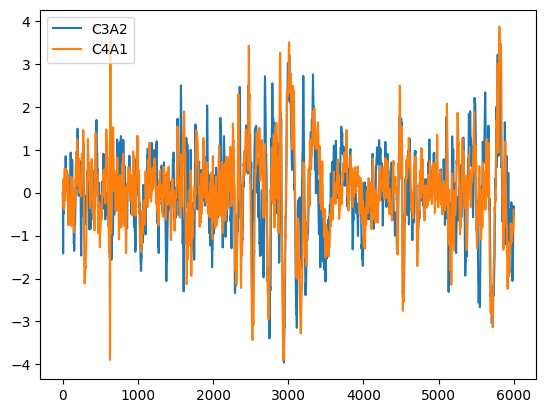

In [94]:
plt.plot(signal_C3A2[80], label='C3A2')
plt.plot(signal_C4A1[80], label='C4A1')
plt.legend()

plt.show()

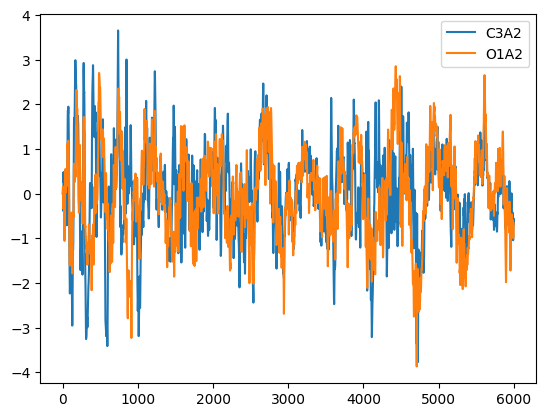

In [91]:
plt.plot(signal_C3A2[100], label='C3A2')
plt.plot(signal_O1A2[100], label='O1A2')
plt.legend()

plt.show()

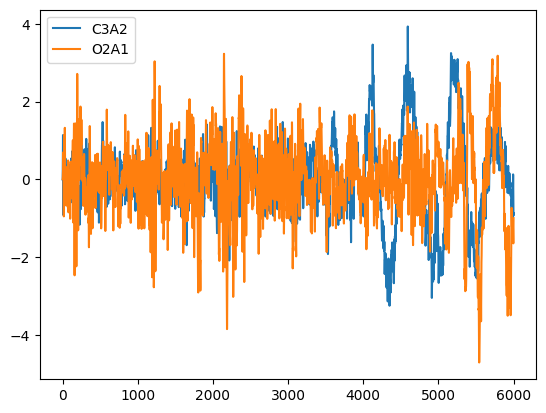

In [85]:
plt.plot(signal_C3A2[1], label='C3A2')
plt.plot(signal_O2A1[1], label='O2A1')
plt.legend()

plt.show()

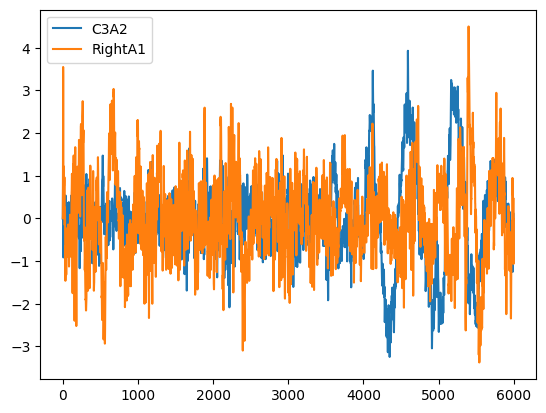

In [95]:
plt.plot(signal_C3A2[1], label='C3A2')
plt.plot(signal_LeftA2[1], label='RightA1')
plt.legend()

plt.show()

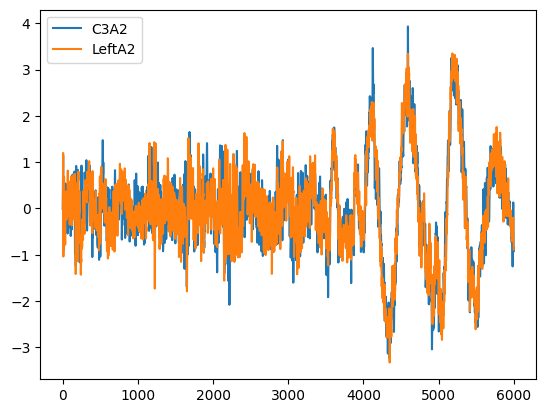

In [96]:
plt.plot(signal_C3A2[1], label='C3A2')
plt.plot(signal_RightA2[1], label='LeftA2')
plt.legend()

plt.show()